In [104]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [105]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [106]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Import Data

In [107]:
df_dummy = pd.read_csv('process_data/dev_factors_2017.csv')
df_dummy.head()

,country,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,...,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,dev
0,Afghanistan,36296111.0,1.875347e+10,11.18,1.900025e+10,102.175789,53.643200,NaN,49.6,64.130,...,66.808703,0.203328,1.850994,0.025297,65.929134,NaN,33.211,53.763223,2.554251,0
1,Albania,2873457.0,1.301969e+10,13.62,1.305148e+10,107.046600,95.265892,57.375259,8.4,78.333,...,94.102097,1.948872,28.792062,10.526845,125.710352,NaN,11.934,68.642614,13.329073,1
2,Algeria,41389174.0,1.700970e+11,13.57,1.675590e+11,111.764481,NaN,47.646832,20.9,76.499,...,93.831977,3.505748,0.815790,7.756294,110.767246,NaN,24.846,64.183205,6.177205,0
3,American Samoa,55617.0,6.120000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.773772,NaN,86.100000,NaN,NaN,NaN,16.600,NaN,NaN,0
4,Andorra,76997.0,3.000181e+09,NaN,NaN,NaN,NaN,NaN,3.1,NaN,...,99.999999,6.104134,34.042553,44.524097,104.332411,NaN,NaN,NaN,NaN,1


<AxesSubplot:>

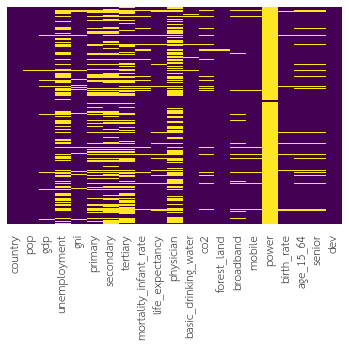

In [108]:
sns.heatmap(df_dummy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [109]:
df_dummy2 = df_dummy.fillna(0)
df_dummy2.head()

,country,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,...,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,dev
0,Afghanistan,36296111.0,1.875347e+10,11.18,1.900025e+10,102.175789,53.643200,0.000000,49.6,64.130,...,66.808703,0.203328,1.850994,0.025297,65.929134,0.0,33.211,53.763223,2.554251,0
1,Albania,2873457.0,1.301969e+10,13.62,1.305148e+10,107.046600,95.265892,57.375259,8.4,78.333,...,94.102097,1.948872,28.792062,10.526845,125.710352,0.0,11.934,68.642614,13.329073,1
2,Algeria,41389174.0,1.700970e+11,13.57,1.675590e+11,111.764481,0.000000,47.646832,20.9,76.499,...,93.831977,3.505748,0.815790,7.756294,110.767246,0.0,24.846,64.183205,6.177205,0
3,American Samoa,55617.0,6.120000e+08,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,...,99.773772,0.000000,86.100000,0.000000,0.000000,0.0,16.600,0.000000,0.000000,0
4,Andorra,76997.0,3.000181e+09,0.00,0.000000e+00,0.000000,0.000000,0.000000,3.1,0.000,...,99.999999,6.104134,34.042553,44.524097,104.332411,0.0,0.000,0.000000,0.000000,1


In [110]:
df = df_dummy2.drop(["country"],axis=1)
df.head()

,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,dev
0,36296111.0,1.875347e+10,11.18,1.900025e+10,102.175789,53.643200,0.000000,49.6,64.130,0.0000,66.808703,0.203328,1.850994,0.025297,65.929134,0.0,33.211,53.763223,2.554251,0
1,2873457.0,1.301969e+10,13.62,1.305148e+10,107.046600,95.265892,57.375259,8.4,78.333,0.0000,94.102097,1.948872,28.792062,10.526845,125.710352,0.0,11.934,68.642614,13.329073,1
2,41389174.0,1.700970e+11,13.57,1.675590e+11,111.764481,0.000000,47.646832,20.9,76.499,1.7879,93.831977,3.505748,0.815790,7.756294,110.767246,0.0,24.846,64.183205,6.177205,0
3,55617.0,6.120000e+08,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.0000,99.773772,0.000000,86.100000,0.000000,0.000000,0.0,16.600,0.000000,0.000000,0
4,76997.0,3.000181e+09,0.00,0.000000e+00,0.000000,0.000000,0.000000,3.1,0.000,0.0000,99.999999,6.104134,34.042553,44.524097,104.332411,0.0,0.000,0.000000,0.000000,1


In [111]:
list1 = list(df.columns)
list1

['pop',
 'gdp',
 'unemployment',
 'gni',
 'primary',
 'secondary',
 'tertiary',
 'mortality_infant_rate',
 'life_expectancy',
 'physician',
 'basic_drinking_water',
 'co2',
 'forest_land',
 'broadband',
 'mobile',
 'power',
 'birth_rate',
 'age_15_64',
 'senior',
 'dev']

In [112]:
X = df[list1[:-1]]
X = sm.add_constant(X, prepend=False)
X.head()

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,const
0,36296111.0,1.875347e+10,11.18,1.900025e+10,102.175789,53.643200,0.000000,49.6,64.130,0.0000,66.808703,0.203328,1.850994,0.025297,65.929134,0.0,33.211,53.763223,2.554251,1.0
1,2873457.0,1.301969e+10,13.62,1.305148e+10,107.046600,95.265892,57.375259,8.4,78.333,0.0000,94.102097,1.948872,28.792062,10.526845,125.710352,0.0,11.934,68.642614,13.329073,1.0
2,41389174.0,1.700970e+11,13.57,1.675590e+11,111.764481,0.000000,47.646832,20.9,76.499,1.7879,93.831977,3.505748,0.815790,7.756294,110.767246,0.0,24.846,64.183205,6.177205,1.0
3,55617.0,6.120000e+08,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000,0.0000,99.773772,0.000000,86.100000,0.000000,0.000000,0.0,16.600,0.000000,0.000000,1.0
4,76997.0,3.000181e+09,0.00,0.000000e+00,0.000000,0.000000,0.000000,3.1,0.000,0.0000,99.999999,6.104134,34.042553,44.524097,104.332411,0.0,0.000,0.000000,0.000000,1.0


In [113]:
y = df[list1[-1]]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: dev, dtype: int64

## ปัจจัยใดบ้างที่คาดว่าจะส่งผลต่อการจำแนกกลุ่มตามการพัฒนาของประเทศมากกว่าปัจจัยอื่นๆ (ในกรณีนี้พิจารณาค่า p-value ที่ต่ำหรีอสูง(ไม่จำเป็นต้องต่ำกว่า 0.1 ในการพิจารณา))


In [114]:
import statsmodels.discrete.discrete_model as sd
model = sd.Logit(y, X)
result = model.fit()
result.summary()

         Current function value: 0.120763
         Iterations: 35


/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dev   No. Observations:                  212
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                           19
Date:                Thu, 07 Apr 2022   Pseudo R-squ.:                  0.7832
Time:                        12:57:02   Log-Likelihood:                -25.602
converged:                      False   LL-Null:                       -118.10
Covariance Type:            nonrobust   LLR p-value:                 3.191e-29
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
pop                    7.161e-10   5.85e-09      0.122      0.903   -1.07e-08    1.22e-08
gdp                   -1.582e-13   5.54e-13     -0.286      0.775   -1.24e-12    9.27e-13
unemployment              0.3083      0.142      2.168      0.030       0.030       0.587
gni                    1.244e-13   4.71e-13      0.264      0.792      -8e-13    1.05e-12
primary                  -0.0042      0.022     -0.192      0.848      -0.047       0.038
secondary                 0.0104      0.021      0.490      0.624      -0.031       0.052
tertiary                  0.0083      0.022      0.374      0.709      -0.035       0.052
mortality_infant_rate    -0.1800      0.122     -1.470      0.142      -0.420       0.060
life_expectancy           0.0106      0.025      0.421      0.674      -0.039       0.060
physician                -0.4222      0.329     -1.282      0.200      -1.068       0.223
basic_drinking_water      0.0221      0.030      0.732      0.464      -0.037       0.081
co2                       0.2403      0.143      1.685      0.092      -0.039       0.520
forest_land              -0.0204      0.024     -0.849      0.396      -0.068       0.027
broadband                 0.0523      0.046      1.138      0.255      -0.038       0.142
mobile                   -0.0044      0.014     -0.325      0.745      -0.031       0.022
power                    -0.0229   1.41e+04  -1.63e-06      1.000   -2.76e+04    2.76e+04
birth_rate                0.0421      0.127      0.332      0.740      -0.206       0.291
age_15_64                -0.1530      0.051     -2.992      0.003      -0.253      -0.053
senior                    0.5374      0.174      3.081      0.002       0.196       0.879
const                    -3.3885      3.637     -0.932      0.352     -10.518       3.741
=========================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## สร้างโมเดลจำแนกประเทศ โดยใช้ปัจจัยที่ให้มา   แบ่งข้อมูล train:test 70:30  วิเคราะผลลัพธ์ของโมเดลที่ได้

#### สร้างโมเดล

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [117]:
model.coef_

array([[-1.37284226e-07,  4.99524234e-12, -1.29426911e-14,
        -2.16086494e-13, -3.03477136e-13, -8.60074981e-14,
         4.18224839e-15, -1.58902094e-13, -2.56778123e-13,
        -4.15001974e-16, -3.35700702e-13, -7.52534563e-15,
        -1.44689367e-13,  1.26209135e-14, -3.84015009e-13,
        -6.66971994e-14, -1.19777005e-13, -2.44003295e-13,
        -2.57062128e-15, -4.35861428e-15]])

In [118]:
model.intercept_

array([-4.35861428e-15])

In [119]:
# lecture example uses all data to train
# typically use X_test to do prediction

predictions = model.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [120]:
# lecture example uses all data to train
# typically use y_test to observe confusion matrix 

print(confusion_matrix(y_test,predictions))

[[43  5]
 [10  6]]


In [121]:
# lecture example uses all data to train
# typically use y_test to observe confusion matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.55      0.38      0.44        16

    accuracy                           0.77        64
   macro avg       0.68      0.64      0.65        64
weighted avg       0.74      0.77      0.75        64



#### ทำนายประเทศไทย

In [122]:
my_data = {
                'pop': [69209817],
                'gdp': [4.56357E+11],
                'unemployment': [0.83],
                'gni': [4.35913E+11],
                'primary': [99.62503052],
                'secondary': [116.7339401],
                'tertiary': [0],
                'mortality_infant_rate': [8.4],
                'life_expectancy': [76.683],
                'physician': [0.8075],
                'basic_drinking_water': [99.76972457],
                'co2': [3.766228713],
                'forest_land': [39.11018027],
                'broadband': [11.85959043],
                'mobile': [175.5964942],
                'power': [0],
                'birth_rate': [10.513],
                'age_15_64': [71.20921442],
                'senior': [11.43696392],
                'const': [1.0]
           }
my_df = pd.DataFrame(my_data, columns=['pop',
 'gdp',
 'unemployment',
 'gni',
 'primary',
 'secondary',
 'tertiary',
 'mortality_infant_rate',
 'life_expectancy',
 'physician',
 'basic_drinking_water',
 'co2',
 'forest_land',
 'broadband',
 'mobile',
 'power',
 'birth_rate',
 'age_15_64',
 'senior', 'const'])
my_df

,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,const
0,69209817,4.563570e+11,0.83,4.359130e+11,99.625031,116.73394,0,8.4,76.683,0.8075,99.769725,3.766229,39.11018,11.85959,175.596494,0,10.513,71.209214,11.436964,1.0


In [123]:
predictions = model.predict(my_df)
predictions

array([0])

#### ทำนายประเทศจีน

In [124]:
my_data = {
                'pop': [1386395000],
                'gdp': [1.23104E+13],
                'unemployment': [3.9],
                'gni': [1.22943E+13],
                'primary': [99.40480804],
                'secondary': [0],
                'tertiary': [49.07326126],
                'mortality_infant_rate': [7.9],
                'life_expectancy': [76.47],
                'physician': [1.9798],
                'basic_drinking_water': [92.84090791],
                'co2': [7.225768991],
                'forest_land': [22.74231029],
                'broadband': [27.73989833],
                'mobile': [103.4384208],
                'power': [0],
                'birth_rate': [12.43],
                'age_15_64': [71.71751844],
                'senior': [10.34512046],
                'const': [1.0]
           }
my_df = pd.DataFrame(my_data, columns=['pop',
 'gdp',
 'unemployment',
 'gni',
 'primary',
 'secondary',
 'tertiary',
 'mortality_infant_rate',
 'life_expectancy',
 'physician',
 'basic_drinking_water',
 'co2',
 'forest_land',
 'broadband',
 'mobile',
 'power',
 'birth_rate',
 'age_15_64',
 'senior', 'const'])
my_df

,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,physician,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,const
0,1386395000,1.231040e+13,3.9,1.229430e+13,99.404808,0,49.073261,7.9,76.47,1.9798,92.840908,7.225769,22.74231,27.739898,103.438421,0,12.43,71.717518,10.34512,1.0


In [125]:
predictions = model.predict(my_df)
predictions

array([0])